In [70]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as seaborn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [71]:
#extract csv from bag files
def data_csv(b):

    csvfiles = []
    for t in b.topics:
        data = b.message_by_topic(t)
        csvfiles.append(data)

    print(csvfiles[0])
    data = pd.read_csv(csvfiles[0])
    return data

In [72]:
b = bagreader("/home/krishna/EECE5554/LAB1/src/Data/walking_data.bag")
csv_data = data_csv(b)

[INFO]  Data folder /home/krishna/EECE5554/LAB1/src/Data/walking_data already exists. Not creating.
/home/krishna/EECE5554/LAB1/src/Data/walking_data/gps.csv


In [73]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/gps,gps_driver/gps_msg,160,0.999869


In [74]:
df_gps = pd.read_csv("/home/krishna/EECE5554/LAB1/src/Data/walking_data/gps.csv")

In [75]:
df_gps

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,UTM_easting,UTM_northing,Zone,Letter
0,1.675892e+09,0,77729,0,GPS1_Frame,42.338705,71.088358,31.9,672036.267906,4.689495e+06,42.0,T
1,1.675892e+09,0,77730,0,GPS1_Frame,42.338705,71.088358,31.9,672036.267906,4.689495e+06,42.0,T
2,1.675892e+09,0,77731,0,GPS1_Frame,42.338708,71.088355,31.5,672035.984208,4.689496e+06,42.0,T
3,1.675892e+09,0,77732,0,GPS1_Frame,42.338710,71.088355,31.1,672035.979663,4.689496e+06,42.0,T
4,1.675892e+09,0,77733,0,GPS1_Frame,42.338712,71.088355,31.1,672035.975118,4.689496e+06,42.0,T
...,...,...,...,...,...,...,...,...,...,...,...,...
155,1.675892e+09,0,77884,0,GPS1_Frame,42.339802,71.089160,34.4,672099.318972,4.689619e+06,42.0,T
156,1.675892e+09,0,77885,0,GPS1_Frame,42.339808,71.089168,33.8,672099.987290,4.689620e+06,42.0,T
157,1.675892e+09,0,77886,0,GPS1_Frame,42.339813,71.089175,33.1,672100.522853,4.689620e+06,42.0,T
158,1.675892e+09,0,77887,0,GPS1_Frame,42.339815,71.089180,33.1,672100.930210,4.689620e+06,42.0,T


In [76]:
#mean data - standardizing the data by subtracting the mean to not have the 10^6 terms

df_gps['UTM_easting_mean'] = df_gps['UTM_easting'] - df_gps['UTM_easting'].mean(axis=0)
df_gps['UTM_northing_mean'] = df_gps['UTM_northing'] - df_gps['UTM_northing'].mean(axis=0)

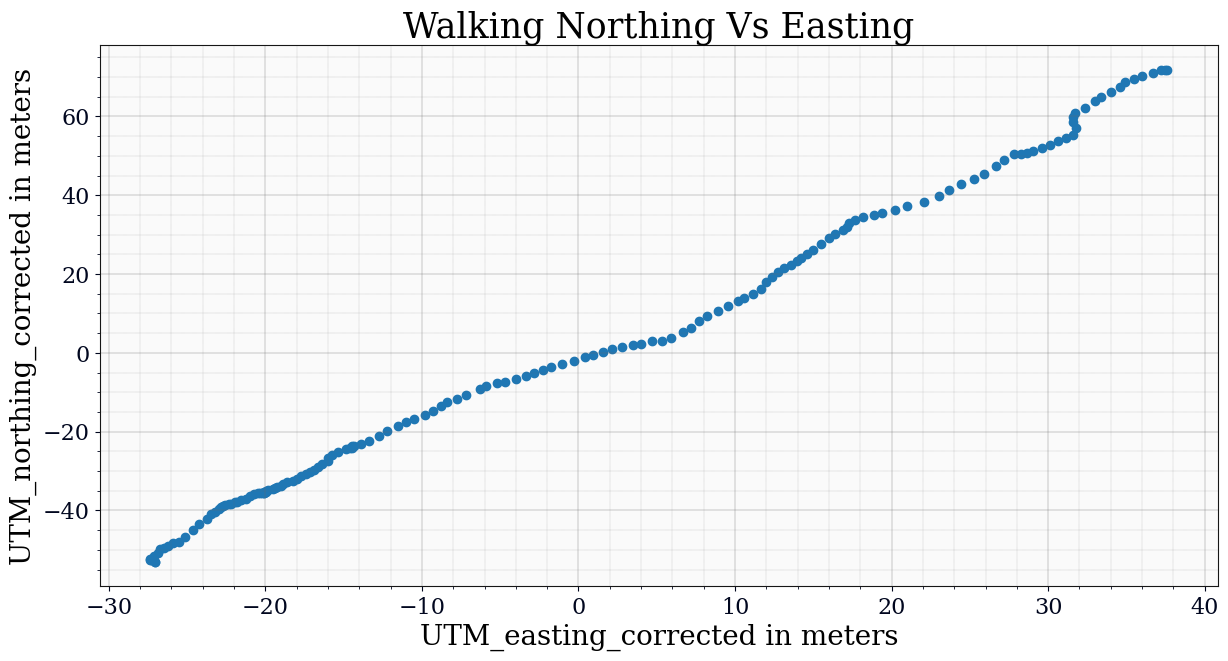

In [77]:
#corrected - the minimum of the each data in easting and northing was subtracted 
#from the  easting and northing datapoints respectively. 
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='UTM_easting_mean', y='UTM_northing_mean', data=df_gps)
plt.xlabel("UTM_easting_corrected in meters")
plt.ylabel("UTM_northing_corrected in meters")
plt.title("Walking Northing Vs Easting")
plt.show()


In [78]:
#mean

[ df_gps['UTM_easting_mean'].mean(), df_gps['UTM_northing_mean'].mean() ]

[-1.964508555829525e-11, 8.731149137020111e-10]

In [79]:
#standard deviation

[ df_gps['UTM_easting_mean'].std(), df_gps['UTM_northing_mean'].std() ]

[20.7005903121765, 37.53640260149397]

In [80]:
#variance
[df_gps['UTM_easting_mean'].var(), df_gps['UTM_northing_mean'].var() ]

[428.51443927257566, 1408.9815202614432]

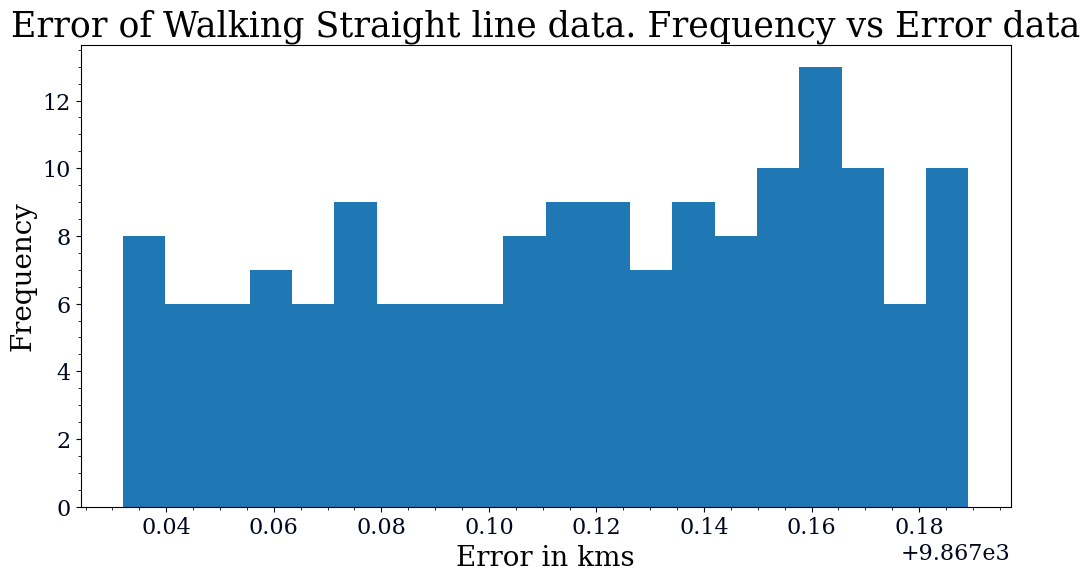

In [81]:
import math

def distance(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # haversine formula 
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers.
    return c * r


# Load the data from a LibreOffice spreadsheet into a pandas DataFrame
df = pd.read_csv('/home/krishna/EECE5554/LAB1/src/Data/walking_data/gps.csv')

# Subtract the first value from each column to scale the data with your stationary data sets
easting = df['UTM_easting'] = df['UTM_easting'] - df['UTM_easting'][0]
northing = df['UTM_northing'] = df['UTM_northing'] - df['UTM_northing'][0]
altitude = df['Altitude']
time = df['Time']
latitude = df['Latitude']
longitude = df['Longitude']


# Error calculations
k_lat_start = 42.338705
k_lat_end = 42.3398133333333

k_lon_start = -71.0883583333333
k_lon_end = -71.0891783333333

k_lats = []
k_lons = []

lat_interval = (k_lat_end - k_lat_start) / 161
lon_interval = (k_lon_end - k_lon_start) / 161

for i in range(0,159):
    k_lats.append(k_lat_start + (i * lat_interval))
    k_lons.append(k_lon_start + (i * lon_interval))

error = []
for i in range(0,159):
    error.append(distance(latitude[i], longitude[i], k_lats[i], k_lons[i]))

# Error histogram plot
plt.hist(error, bins=20)
plt.xlabel('Error in kms')
plt.ylabel('Frequency')
plt.title('Error of Walking Straight line data. Frequency vs Error data')
plt.show()


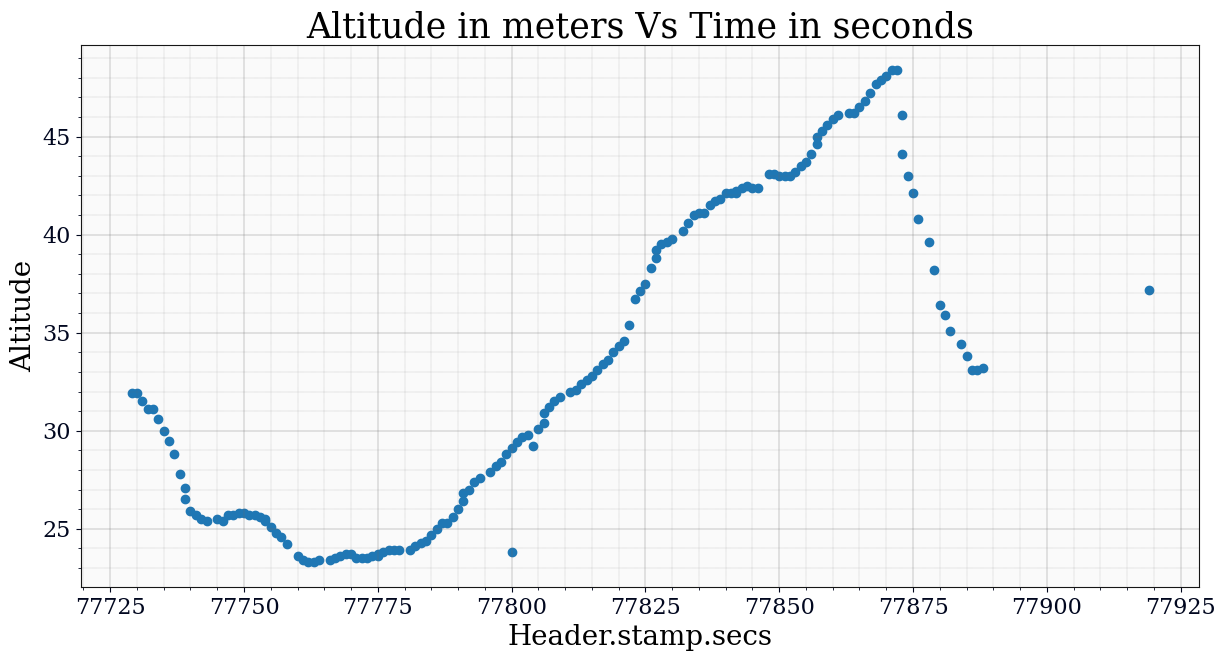

In [82]:
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='Header.stamp.secs', y='Altitude', data=df_gps)
plt.xlabel("Header.stamp.secs")
plt.title("Altitude in meters Vs Time in seconds")
plt.ylabel("Altitude")
plt.show()

In [83]:
#standard deviation
df_gps['UTM_northing_mean'].std() 

37.53640260149397

In [84]:
#mean, variance

[ df_gps['Altitude'].mean(), df_gps['Altitude'].var() ]

[33.26375, 64.40031289308176]